# Supervised learning project assignment##

# Project Description#

Campaign for selling personal loans


This case is about a bank (Thera Bank) which has a growing customer base. Majority of these
customers are liability customers (depositors) with varying size of deposits. The number of customers
who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this
base rapidly to bring in more loan business and in the process, earn more through the interest on
loans. In particular, the management wants to explore ways of converting its liability customers to
personal loan customers (while retaining them as depositors). A campaign that the bank ran last year
for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the
retail marketing department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.


The department wants to build a model that will help them identify the potential customers who have
higher probability of purchasing the loan. This will increase the success ratio while at the same time
reduce the cost of the campaign.


The file Bank.xls contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer&#39;s relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among
these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

DataSet-Bank_Personal_Loan_Modelling.csv

Column Descrition - TheraBank_Column_Description.xlsx

1. Read the column description and ensure you understand each attribute well


2. Study the data distribution in each attribute, share your findings. (10 points)


3. Get the target column distribution. 


4. Split the data into training and test set in the ratio of 70:30 respectively


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a
liability customer buying personal loans (30 points)


6. Print the confusion matrix for all the above models (10 points)


7. Give your reasoning on which is the best model in this case and why it performs better? (10 points)

## Data Description: ##								
								
    ID	Customer ID							
    Age	Customer's age in completed years							
    Experience	#years of professional experience							
    Income	Annual income of the customer							
    ZIPCode	Home Address ZIP code.							
    Family	Family size of the customer							
    CCAvg	Avg. spending on credit cards per month 						
    Education	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
    Mortgage	Value of house mortgage if any. ($000)							
    Personal Loan	Did this customer accept the personal loan offered in the last campaign?						
    Securities Account	Does the customer have a securities account with the bank?							
    CD Account	Does the customer have a certificate of deposit (CD) account with the bank?							
    Online	Does the customer use internet banking facilities?							
    CreditCard	Does the customer use a credit card issued by UniversalBank?							

In [1]:
##Import the standard libraries needed for data management and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read and load the local copy of the data set

bank_cust_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

#Do a sanity check with sample and head
print(bank_cust_df.head(5))

##Data loaded properly


   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [3]:
#Save a copy for use later if needed without having to load again from file

bank_cust_df_base = bank_cust_df.copy()


In [4]:
##Check 5 random sample again for sanity check
bank_cust_df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
826,827,48,21,23,93555,3,0.67,2,0,0,0,0,1,0
3423,3424,61,35,38,93009,2,1.00,3,0,0,0,0,0,0
3915,3916,38,13,91,92037,1,2.80,1,0,0,0,0,1,1
854,855,52,28,90,95814,1,2.60,2,0,0,1,0,1,0
431,432,39,13,75,94305,3,2.10,1,224,0,0,0,1,0


In [5]:
##Get the general characteristics of the data set
print("Shape of the dataset : ",bank_cust_df.shape)

#5000 records with 14 columns

Shape of the dataset :  (5000, 14)


In [6]:
##Check the data types and number of records for each column
print("Info :\n",bank_cust_df.info())

##No null values per se (need to check the actual values to see if it makes sense)
##All are int or float. 
#From the data description we can notice that many of the features have already been numerically encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Info :
 None


In [7]:
##Check the high level distribution
bank_cust_df.describe().T

##High Level Observations below

#ID can be set as the index of the data set
#Age and Experience seem to be almost normally distributed with very identical std dev.
#Experience has negative values - need to correct
#Income is right skewed based on mean and median. There could be some outliers.
#Mortgage - Lot of zeros which could be valid and affecting the mean and other measures
#CCAvg also seems to be slightly right skewed
#Personal Loan - Very less acceptance values (already encoded as 1/0)
#ZipCode has one value 9307 which needs to be checked..every other record seems to be 5 digits
#The other columns - Securities Account, CD account, Online account, CreditCard are already encoded with 1/0

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [8]:
##Lets set the ID column as the index
bank_cust_df.set_index("ID",inplace=True)

##Sanity Check
bank_cust_df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [43]:
##Question 1 and 2- Deep dive into each attribute and note down observations

#Using a mix of numbers and visualization to understand the data

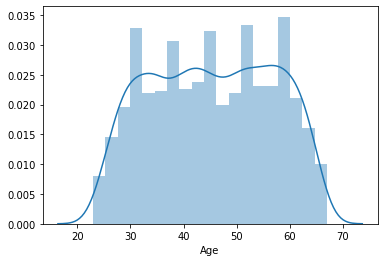

In [9]:
#Age distribution

sns.distplot(bank_cust_df["Age"])
#As expected kind of a normal distribution with comparable distribution for the bulk of the age groups

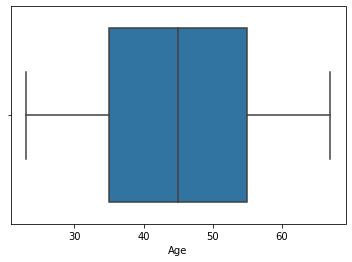

In [10]:
#Lets do a box plot as well for Age
sns.boxplot(bank_cust_df["Age"])

#Age seems be distrubuted uniformaly across the dataset..no outliers from this view

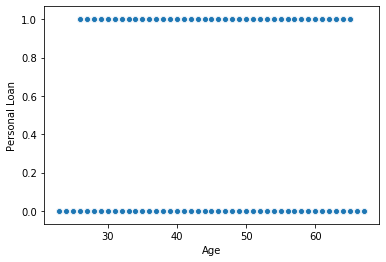

In [11]:
##Check the relation between Age and Personal Loan offer
sns.scatterplot(x=bank_cust_df["Age"],y=bank_cust_df["Personal Loan"])

##Loan offer seem to have been accepted across the spectrum except the very young and very old..

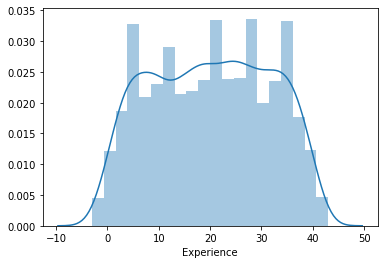

In [12]:
##Experience Level

sns.distplot(bank_cust_df["Experience"])

##Experience kind of matches age as expected overall

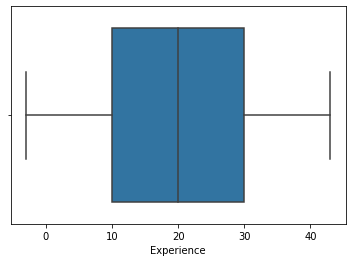

In [13]:
##Box plot for Experience
sns.boxplot(bank_cust_df["Experience"])

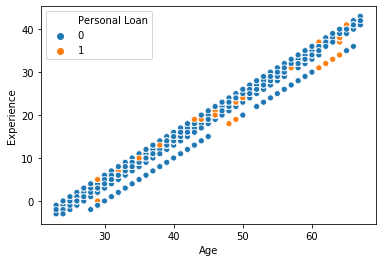

In [14]:
##Age and Experience corelation..looks like they are almost linear..
sns.scatterplot(x=bank_cust_df["Age"], y=bank_cust_df["Experience"],hue=bank_cust_df["Personal Loan"])

#Personal Loan acceptance also seems to be spread across with no clear separation. 
#Should explore if we need both. One should be enough

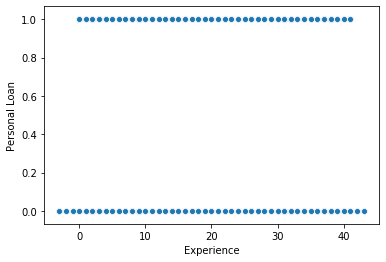

In [15]:
##Relation between Experience and Personal Loan offer acceptance...
#should be similar to Age since Age and Exp are linear
sns.scatterplot(x=bank_cust_df["Experience"],y=bank_cust_df["Personal Loan"])

#Again nothing much other than very low and lot of experience people did not accept loan offer

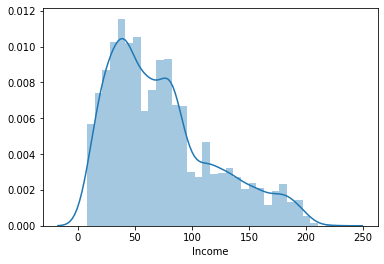

In [16]:
#Income distribution
sns.distplot(bank_cust_df["Income"])

#Income is right skewed as could be expected in general population. 

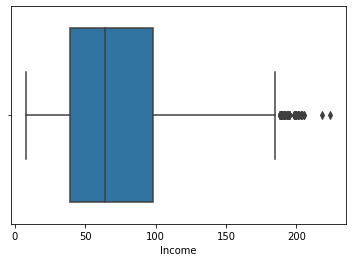

In [17]:
##Income box plot
sns.boxplot(bank_cust_df["Income"])

#Again as expected there are outliers in the Income data...to be kept in mind

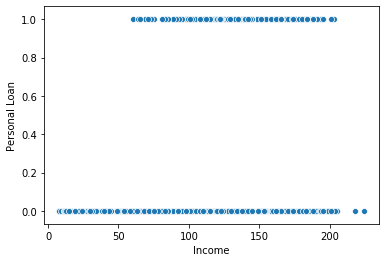

In [18]:
#Lets do a scatter plot for Income vs Personal Loan


sns.scatterplot(data=bank_cust_df, x="Income", y="Personal Loan")

#Except for some lower income folks most seem to have accepted an personal loan offer. 
#Maybe offer was not valid or low.
#Nothing different among outliers as well

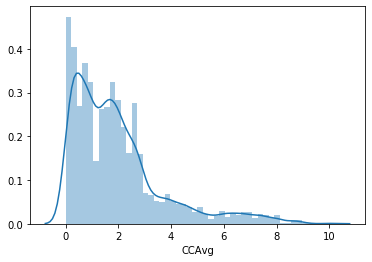

In [19]:
#Credit card spend
sns.distplot(bank_cust_df["CCAvg"])

#Again right skewed

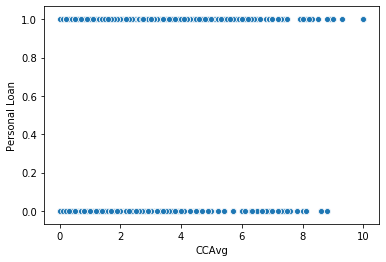

In [20]:
##plot for average credit card spend and personal loan offer
sns.scatterplot(data=bank_cust_df, x="CCAvg", y="Personal Loan")

##No clear cut seperation on acceptance of personal offer

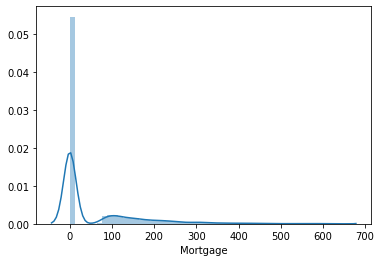

In [21]:
##Mortgage distribution
sns.distplot(bank_cust_df["Mortgage"])

##Extremely right skewed primarily because many have not taken any mortgage

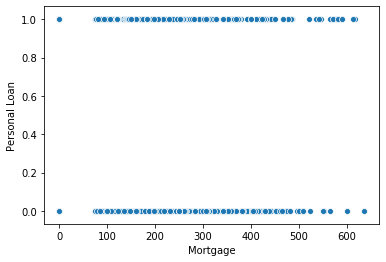

In [22]:
 ##Mortgage vs personal loan offer acceptance
sns.scatterplot(data=bank_cust_df, x="Mortgage",y="Personal Loan")

##Noting much..people with and without mortgage have taken up personal loan offer

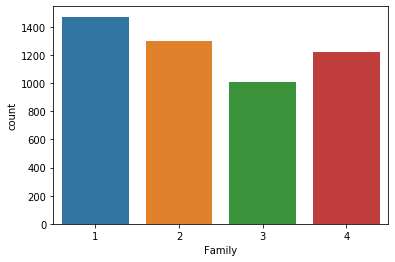

In [23]:
##Family size distribution

sns.countplot(bank_cust_df["Family"])

##Data seems to have all family sizes in somewhat comparable ranges with bit of variance.
#Lets check the relation with personal loan offers

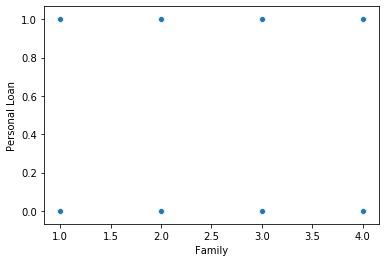

In [24]:
##Personal loan vs Family size

sns.scatterplot(x=bank_cust_df["Family"],y=bank_cust_df["Personal Loan"])

##No clear correlation at all

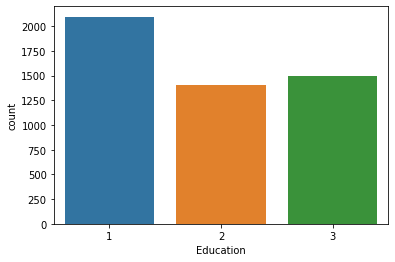

In [25]:
##Lets check the distribution and relations of Education
sns.countplot(bank_cust_df["Education"])

##Peope with graduate and advanced degrees are lesser than undergrads...
#but data is probably representative for each class

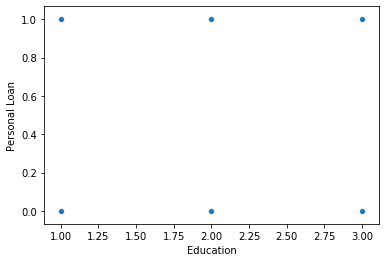

In [26]:
#Relation of education with personal loan acceptance
sns.scatterplot(x=bank_cust_df["Education"],y=bank_cust_df["Personal Loan"])

##Nothing direct in there

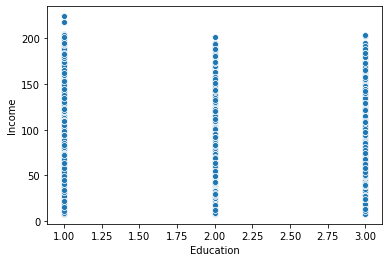

In [27]:
##Out of curiosity lets check income and education
sns.scatterplot(x=bank_cust_df["Education"],y=bank_cust_df["Income"])

##Very interesting that income and education does not have a direct relation.

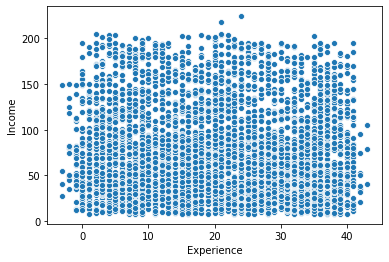

In [28]:
##Income and experience
sns.scatterplot(x=bank_cust_df["Experience"],y=bank_cust_df["Income"])

##Again very intesting

Securities Account
0    4478
1     522
Name: Securities Account, dtype: int64


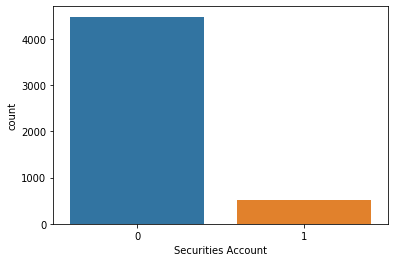

In [29]:
##Distribution and relationship of Securities Account
print(bank_cust_df.groupby("Securities Account")["Securities Account"].count())
sns.countplot(bank_cust_df["Securities Account"])


##Very less percentage in the sample size have a securities account
#Will be interesting to explore this and customer profile

CD Account
0    4698
1     302
Name: CD Account, dtype: int64


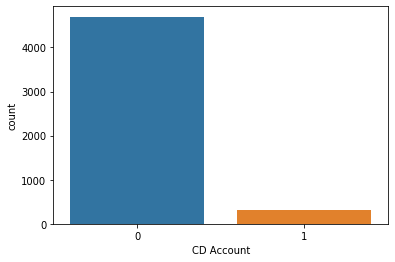

In [30]:
##Distribution and relationship of CD
print(bank_cust_df.groupby("CD Account")["CD Account"].count())
sns.countplot(bank_cust_df["CD Account"])

#Again very less percentage have depository certificate..similar to securities account

Online
0    2016
1    2984
Name: Online, dtype: int64


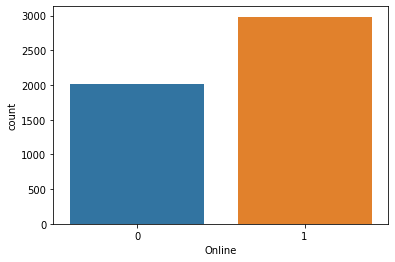

In [31]:
##Distribution and relationship of online banking usage
print(bank_cust_df.groupby("Online")["Online"].count())
sns.countplot(bank_cust_df["Online"])

##Slightly less skewed..more people in the sample seems to be aware and using online banking facility
#Interesting because not many seem to have securities account..

CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64


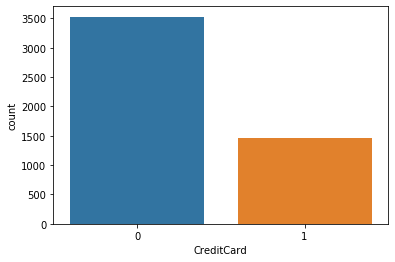

In [32]:
##Distribution and relationship of credit card customers
print(bank_cust_df.groupby("CreditCard")["CreditCard"].count())
sns.countplot(bank_cust_df["CreditCard"])

##Less people have a credit card

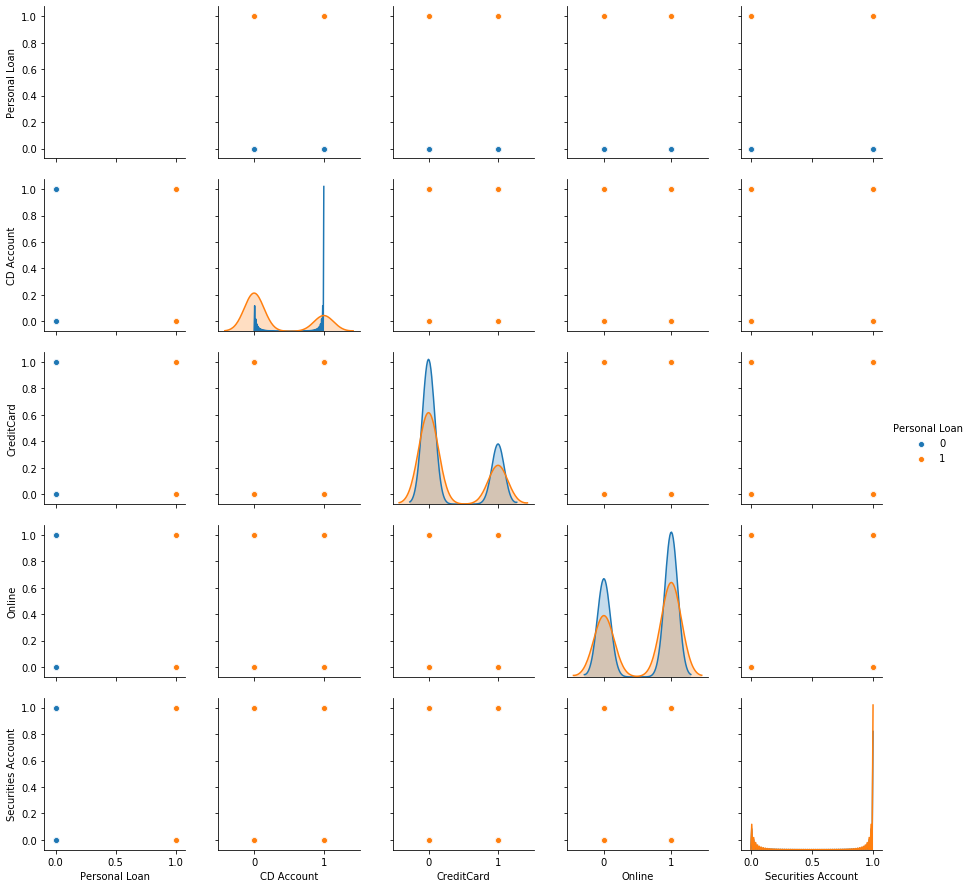

In [33]:
##Lets check how the personal offer acceptance is related or influenced by
# having a credit card, online account, deposit or securities account
sns.pairplot(bank_cust_df[["Personal Loan", "CD Account", "CreditCard","Online","Securities Account"]],\
             diag_kind="kde",hue="Personal Loan")

##Does not look to have any direct correlation at all but the distribution is interesting 

In [34]:
##Correlations among the feature and target variables
bank_cust_df.corr()

#Income seems to have the most correlation with the personal loan offer acceptance
#There seems to be little bit of correlation with credit card spend and having deposit
#Even less correlation of personal loan acceptance is seen with education, mortgage and Family size
#The direct correlation among others and personal loan is very very minimal.
#As observed Age and Experience are very highly correlated as expected. We should look to retain only as a feature
#There is a decent correlation among Income and CC spend...but we probably need to retain as it is not extremely high


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


In [35]:
##Check the variance of data...ignore the encoded features
bank_cust_df[["Age","Experience","Income","CCAvg","Mortgage"]].var()
#As seen and observed earlier and variance is similar for Age, Experience
#Variance for CCAvg is low but not really very low
#Mortgage variance is skewed because many do not have a mortgage

Age             131.404166
Experience      131.513962
Income         2119.104235
CCAvg             3.054312
Mortgage      10345.697538
dtype: float64

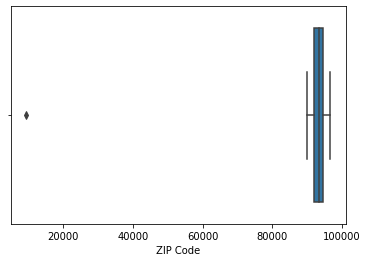

In [36]:
##ZIP Code distribution and analysis
sns.boxplot(bank_cust_df["ZIP Code"])

#One outlier - 9307 - seems to be a data issue as it is only 4 digits
#Since this is just one record we might just drop it if we are going to use Zip Code as a feature


In [37]:
##Convert ZIP code to categorical variable
bank_cust_df["ZIP Code"] = pd.Categorical(bank_cust_df['ZIP Code'])

##sanity check 
print(bank_cust_df["ZIP Code"].head(2))
print(bank_cust_df.info())

ID
1    91107
2    90089
Name: ZIP Code, dtype: category
Categories (467, int64): [9307, 90005, 90007, 90009, ..., 96094, 96145, 96150, 96651]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null category
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), float64(1), int64(11)
memory usage: 701.2 KB
None


In [38]:
##Summary of ZIP Code
print(bank_cust_df["ZIP Code"].describe())

count      5000
unique      467
top       94720
freq        169
Name: ZIP Code, dtype: int64


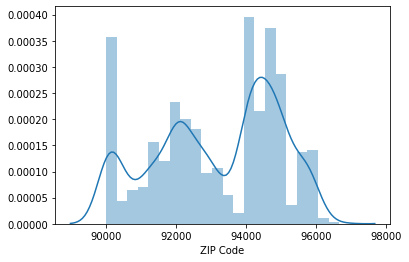

In [39]:
#Distribution of ZIP Code .ignoring the one record (9307) with probably wrong value
sns.distplot(bank_cust_df[bank_cust_df["ZIP Code"] != 9307]["ZIP Code"])

#Sample has data from some localities more...

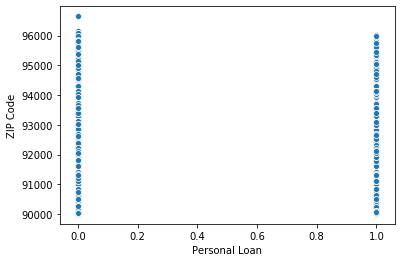

In [40]:
##Personal loan and ZIP Code relationship....ignoring the single 9307 record which seems to be a problem
sns.scatterplot(data=bank_cust_df[bank_cust_df["ZIP Code"] != 9307], x="Personal Loan",y="ZIP Code")

##Again..nothing which stands out in terms of the relationship..

In [41]:
##Lets do a sanity check by checking the personal loan offers in the most freqently occuring ZIP and top ZIP codes
top_zipCodes = bank_cust_df.groupby("ZIP Code")["ZIP Code"].count().sort_values(ascending=False).head(5).index.values
print("5 frequently occuring Zip Codes : \n",top_zipCodes)

5 frequently occuring Zip Codes : 
 [94720, 94305, 95616, 90095, 93106]
Categories (467, int64): [9307, 90005, 90007, 90009, ..., 96094, 96145, 96150, 96651]


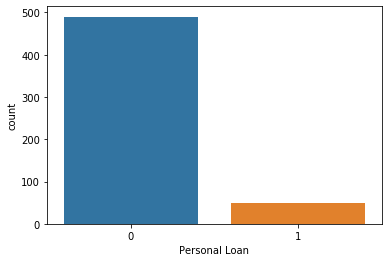

In [42]:
##Distribution of personal loan acceptance offers among top occuring ZIP codes

sns.countplot(bank_cust_df[bank_cust_df["ZIP Code"].isin(top_zipCodes)]["Personal Loan"])

##Distribution is similar..confirming not much direct relation

In [44]:
#Q3 - Target Variable distribution

##Target value distribution

bank_cust_df.groupby("Personal Loan")["Personal Loan"].count()

##No of people who accepted the personal offer is very very low in the data set

Personal Loan
0    4520
1     480
Name: Personal Loan, dtype: int64

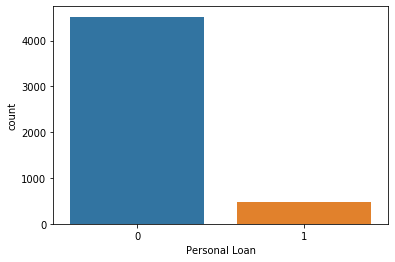

In [45]:
##plot the personal loan offer acceptance numbers
sns.countplot(bank_cust_df["Personal Loan"])

#As described in the problem statement the percentage of customers who have accepted loan offer is very less
##This will probably affect the model recall for the loan acceptance cases

In [46]:
##Check the % of 1 and 0 to get the base model accuracy we are trying for
print("Personal Loan Acceptance Rate in the sample :",bank_cust_df["Personal Loan"].mean())
print("\nPersonal Loan Offer Rejection/Null Accuracy", 1-bank_cust_df["Personal Loan"].mean())

#We need to ensure our model can go above this rate. Otherwise we can just have a model which always 
#predicts 0 and gets an overall accuracy of 90%

#We need to check the recall value of 1s to see if it makes sense for our model

Personal Loan Acceptance Rate in the sample : 0.096

Personal Loan Offer Rejection/Null Accuracy 0.904


In [47]:
##Trying to understand the relationship among the variables and target using statsmodel glm
#Import the needed modules
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [48]:
#converting some of the column names to avoid errors in the formula used and take a copy
sm_bank_cust_df = bank_cust_df.copy()
sm_bank_cust_df.rename(columns={"ZIP Code" : "Zip",
                               "Personal Loan": "Loan",
                               "Securities Account" : "secAccount",
                               "CD Account" : "cdAccount"},inplace=True)

##sanity
sm_bank_cust_df.head(2)

,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Loan,secAccount,cdAccount,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [49]:
#Check if the effect of direct relation among variables and loan
#not including categorical ZIP Code
formula = "Loan ~ Age + Experience + Income + Family + CCAvg + Education + Mortgage + \
                                                        secAccount + cdAccount + Online + CreditCard"

sm_logit = smf.glm(formula=formula,data=sm_bank_cust_df,family=sm.families.Binomial()).fit()

In [50]:
##Get the model summary

print(sm_logit.summary())


##Interesting observations around Age (and therefore Experience), Mortgage
#Lets try dropping them and see in one of the iterations of the model

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Loan   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -642.18
Date:                Tue, 29 Oct 2019   Deviance:                       1284.4
Time:                        18:46:12   Pearson chi2:                 7.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1927      1.645     -7.411      0.0

In [51]:
##Check the impact of Zip Code only
formula_zip = "Loan ~ C(Zip)"

sm_logit_zip = smf.glm(formula=formula_zip,data=sm_bank_cust_df, family=sm.families.Binomial()).fit()

#Results
print(sm_logit_zip.summary())

##Intersting P-values..there does not seem to be any influence


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Loan   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4533
Model Family:                Binomial   Df Model:                          466
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.8
Date:                Tue, 29 Oct 2019   Deviance:                       2677.6
Time:                        18:46:25   Pearson chi2:                 3.69e+03
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -27.5635   5.87e+05  -4.

In [52]:
#Lets check the p-values once again to see of any of them have a p-value which indicates some influence

print("Are there any which are not close to 1.0 :",(round(sm_logit_zip.pvalues) != 1.0).any())

#I think we can probably drop ZIP as well.

Are there any which are not close to 1.0 : False


In [53]:
##Dropping Age, Experience and Mortgage
formula_second = "Loan ~ Income + Family + CCAvg + Education + secAccount + cdAccount + Online + CreditCard"
sm_logit_second = smf.glm(formula=formula_second,data=sm_bank_cust_df,family=sm.families.Binomial()).fit()

#Results
print(sm_logit_second.summary())

#All of the others still have influence on loan acceptance

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Loan   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4991
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -644.31
Date:                Tue, 29 Oct 2019   Deviance:                       1288.6
Time:                        18:46:36   Pearson chi2:                 6.96e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.2242      0.562    -23.510      0.0

In [54]:
##Lets check on the potential dropped features only and relation
formula_drop = "Loan ~ Age + Experience + Mortgage"

sm_logit_drop = smf.glm(formula=formula_drop,data=sm_bank_cust_df,family=sm.families.Binomial()).fit()

#Results
print(sm_logit_drop.summary())

#Mortgage seems to have little better influence than Age/Experience

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Loan   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4996
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1539.6
Date:                Tue, 29 Oct 2019   Deviance:                       3079.3
Time:                        18:47:03   Pearson chi2:                 5.12e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4578      1.015     -2.422      0.0

In [56]:
###Data cleaning and updates


In [57]:
##Based on the observations around the collinearity between Age and Experience as well with the statsmodel 
#we will drop Experience from the features used for model building

#Before that trying out some data clean up only for learning on Experience column



In [58]:
#As observed earlier, the experience column seems to have negative values (as seen in the minimum value and distributions)

#Get the count of negative values by Age
print("Negative values by Age :\n")
print(bank_cust_df[bank_cust_df["Experience"] < 0][["Age","Experience"]].groupby(by="Age").agg("count"))
print("\nTotal records with negative values: \n")
print(bank_cust_df[bank_cust_df["Experience"] < 0]["Experience"].count())
print("\nSample records with negative values \n")
print(bank_cust_df[bank_cust_df["Experience"] < 0].sample(5))

#Based on the values and age groups where this is occuring one possibility is that this is a data issue
#We could convert these to positive values and use them
#Another option could be to drop these altogether but the caveat is we may be missing some information in the other
#features which may help with the model 
#We could also make use of the near perfect linear relation to update the missing experience



Negative values by Age :

     Experience
Age            
23           12
24           17
25           18
26            1
28            1
29            3

Total records with negative values: 

52

Sample records with negative values 

      Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
ID                                                                           
4286   23          -3     149    93555       2    7.2          1         0   
687    24          -1      38    92612       4    0.6          2         0   
316    24          -2      51    90630       3    0.3          3         0   
598    24          -2     125    92835       2    7.2          1         0   
1523   25          -1     101    94720       4    2.3          3       256   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
ID                                                                       
4286              0                   0           0       1           

In [59]:
#One common approach will be to use the mean of the respective age groups to update experience
print("Mean of experience by age group :\n")

#get ages with negative experience
age_with_neg_exp = bank_cust_df[bank_cust_df["Experience"] < 0].groupby("Age")["Age"].agg("count").index.values

#Get the mean of experience for these age groups..ignoring the negative ones
mean_exp_df = bank_cust_df[(bank_cust_df["Age"].isin(age_with_neg_exp)) \
                   & (bank_cust_df["Experience"] >=0)].groupby("Age")["Experience"].agg("mean")
print(mean_exp_df)

#One immediate problem is that the mean for Age group 23 is still negative and 24 is zero..
#So this approach may still not be good.
#We could try a simpler approach since we know the data and number of records are small enough

#Replace negative values with positive

bank_cust_df["Experience"] = bank_cust_df["Experience"].apply(lambda x: x*(-1) if x < 0 else x)

#Check sanity
print("\nTotal records with negative values: \n")
print(bank_cust_df[bank_cust_df["Experience"] < 0]["Experience"].count())

#Check some sample records for age group 23
print("Sample records for Age group 23 : \n")
print(bank_cust_df[bank_cust_df["Age"] == 23].sample(2))

##Negative values are replaced

Mean of experience by age group :

Age
24    0.000000
25    0.514286
26    0.987013
28    3.009804
29    3.833333
Name: Experience, dtype: float64

Total records with negative values: 

0
Sample records for Age group 23 : 

      Age  Experience  Income ZIP Code  Family  CCAvg  Education  Mortgage  \
ID                                                                           
3825   23           1      12    95064       4    1.0          1         0   
2431   23           1      73    92120       4    2.6          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
ID                                                                       
3825              0                   1           0       0           1  
2431              0                   0           0       1           0  


In [60]:
#Check the summary of data now
print("Summary stats after negative experience value correction \n")
bank_cust_df.describe().T

#mean and std dev did not change significantly

Summary stats after negative experience value correction 



,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


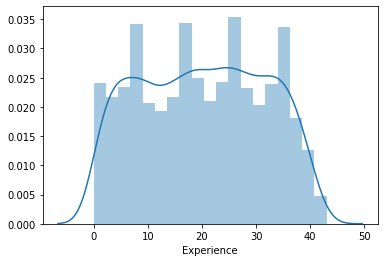

In [61]:
#Quick check on the distribution of experience now
sns.distplot(bank_cust_df["Experience"])

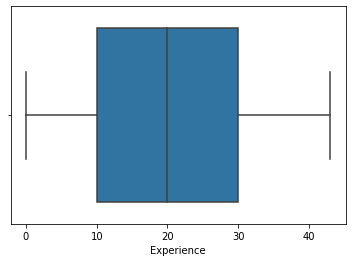

In [62]:
#Experience boxplot
sns.boxplot(bank_cust_df["Experience"])

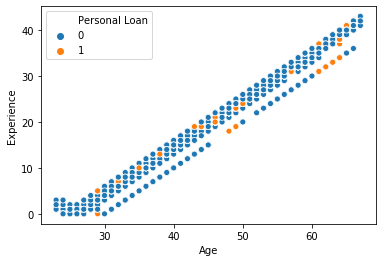

In [64]:
##Quick visualization to check the linear relation again
sns.scatterplot(data=bank_cust_df,x="Age",y="Experience",hue="Personal Loan")

In [65]:
#Quick check to see if anything happened on correlation
bank_cust_df.corr()

#ZIP Code is now categorical..hence not in this view now
##No significant change in the observations from earlier

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


In [66]:
##Lets drop Experience and use Age as a proxy for now
bank_cust_df.drop("Experience",axis=1,inplace=True)

#Sanity checks
bank_cust_df.head(2)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,34,90089,3,1.5,1,0,0,1,0,0,0


In [67]:
##Lets also drop ZIP Code from the feature set as this categorical value does not seem to have any correlation based
#stats model analysis
bank_cust_df.drop("ZIP Code",axis=1,inplace=True)

#Sanity
bank_cust_df.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1,25,49,4,1.6,1,0,0,1,0,0,0
2,45,34,3,1.5,1,0,0,1,0,0,0


In [68]:
##We should also probably drop the Age, Mortage values as well based on statsmodel
#lets check how the correlation looks
bank_cust_df.corr()

#Do not see much colinearity among the features itself (like Age and Experience)
#Lets go ahead and keep the remaining in the first iteration of the models

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644
Online,0.013702,0.014206,0.010354,-0.003611,-0.015004,-0.005995,0.006278,0.012627,0.175880,1.000000,0.004210


In [69]:
##Copy the existing feature set to another df for the first iteration of the models
first_model_df = bank_cust_df.copy()

#Sanity
first_model_df.head(1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1,25,49,4,1.6,1,0,0,1,0,0,0


In [70]:
##X will have all the features and y will have the target variable
y = first_model_df.iloc[:,6]
X = first_model_df.drop("Personal Loan",axis=1).iloc[:,:]


#check for sanity
print("X dataframe \n",X.head(2).T)
print("\ny data frame \n",y.head(2))

X dataframe 
 ID                     1     2
Age                 25.0  45.0
Income              49.0  34.0
Family               4.0   3.0
CCAvg                1.6   1.5
Education            1.0   1.0
Mortgage             0.0   0.0
Securities Account   1.0   1.0
CD Account           0.0   0.0
Online               0.0   0.0
CreditCard           0.0   0.0

y data frame 
 ID
1    0
2    0
Name: Personal Loan, dtype: int64


In [71]:
###Model Building and Evaluation


##Import the libraries needed
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler


In [72]:
##Helper function to execute the basic model building steps and return the standard classification metrics
#model_name = Name to be tagged to the returned metrics dict
#model = actual model object to be initialized outside
#X, y - feature and target data
#test_split, seed - for split with default values
#cross_val = If true we will do a regular Kfold cross validation and tag those metrics as well

def build_model(model_name,model, X, y, test_split=0.30, seed=3, cross_val=False,comments="No comments"):
    '''Helper function to the basic model building steps and return the standard classification metrics '''
    
    
    #Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=seed)
    
    ##Preprocessing/Scaling appropriately
    
    ##Scaling using MinMax
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Fit the model to the training data
    model.fit(X_train,y_train)
    
    #Get the training data prediction
    y_train_predict = model.predict(X_train)
    
    #Get the prediction on the test set
    y_predict = model.predict(X_test)
    
    
    #Train Metrics
    train_accuracy = model.score(X_train, y_train)
    train_confusion_matrix = confusion_matrix(y_train, y_train_predict)
    train_classification_report = classification_report(y_train, y_train_predict)
    train_classification_dict = classification_report(y_train, y_train_predict,output_dict=True) #to help in summary
    
    #Test Metrics
    test_accuracy = model.score(X_test, y_test)
    test_confusion_matrix = confusion_matrix(y_test, y_predict)
    test_classification_report = classification_report(y_test, y_predict)
    test_classification_dict = classification_report(y_test, y_predict,output_dict=True) #to help in summary
   
    
    
    
    #if flag is true calculate and store..otherwise just a comment
    if cross_val == True:
        #Have 10 splits
        kfold = KFold(n_splits=10,random_state=seed)
        #Check the scores ..using accuracy and recall as the scoring method..added roc as well
        #Take care of scaling X
        results_accuracy = cross_val_score(model, scaler.transform(X), y, scoring='accuracy', cv=kfold)
        results_recall = cross_val_score(model, scaler.transform(X), y, scoring='recall', cv=kfold)
        results_roc = cross_val_score(model, scaler.transform(X), y, scoring='roc_auc', cv=kfold)
        cv_results = {"accuracy_mean" : results_accuracy.mean(),
                      "accuracy_var" :  results_accuracy.var(),
                      "recall_mean" : results_recall.mean(),
                      "recall_var" : results_recall.var(),
                      "roc_auc_mean": results_roc.mean(),
                      "roc_auc_var": results_roc.var()}
    else:
        cv_results = "Cross Validation Not Performed"
        
    ##Group Relevant items for model comparison later in an easy to access dict
    for_comp = {"Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "CV Accuracy": cv_results["accuracy_mean"],
            "Precision (Class 1)": test_classification_dict["1"]["precision"],
            "Recall (Class 1)": test_classification_dict["1"]["recall"],
            "F1 Score (Class 1)": test_classification_dict["1"]["f1-score"],
            "CV Recall": cv_results["recall_mean"],
            "CV ROC_AUC": cv_results["roc_auc_mean"],
            "Comments": comments}
    
    #Return a dict of dict with model name, training and test metrics. Add CV results if selected
    
    return { "Model Name": model_name,
             "Training Metrics": {"accuracy": train_accuracy,
                                  "confusion_matrix": train_confusion_matrix,
                                  "classification_report": train_classification_report},
             "Test Metrics": {"accuracy": test_accuracy,
                              "confusion_matrix": test_confusion_matrix,
                              "classification_report": test_classification_report},
             "cv": cv_results,
             "summary": for_comp}


In [73]:
##Helper function to be used along with the build_model function.
#Takes the dict from build_model function and prints all the data

def print_model_metrics(model_metrics):
    '''Helper function to be used along with the build_models function.'''
    
    
    print(f'Model Name: {model_metrics["Model Name"]} \n')
    print("Training Performance Data\n")
    print("Training accuracy :",model_metrics["Training Metrics"]["accuracy"])
    print("Confusion Matrix \n",model_metrics["Training Metrics"]["confusion_matrix"])
    print("Overall summary and scores\n",model_metrics["Training Metrics"]["classification_report"])

    print("\nTest Performance Data\n")

    print("Test accuracy :",model_metrics["Test Metrics"]["accuracy"])
    print("Confusion Matrix \n",model_metrics["Test Metrics"]["confusion_matrix"])
    print("Overall summary and scores\n",model_metrics["Test Metrics"]["classification_report"])
    
    print("Cross Validation Results:", model_metrics["cv"])


In [74]:
###Initialze the model_summary df for storing basic parameter for ease of comparison and visualization
model_summary_df = pd.DataFrame(columns=["Train Accuracy","Test Accuracy","CV Accuracy","Precision (Class 1)", \
                                         "Recall (Class 1)", "F1 Score (Class 1)", "CV Recall", "CV ROC_AUC","Comments"])

In [75]:
###ITERATION ONE - 4 Models with all features except Experience and ZIP Code#######

In [76]:
##First Iteration - First Model Logistic Regression based classifier
#Test Split at 30%
#seed used for initializing random state for repeatability
#Perform cross validation also to check the model flexibility

log_model = LogisticRegression()

In [77]:
##Use the helper function to execute the steps

log_model_metrics = build_model("Logistic Regression - Iteration 1", log_model, X, y, test_split=0.30, seed=3, \
                                cross_val=True,comments="Logistic Reg. with all except Exp. and Zip")


In [78]:
##Use the helper function to display the accuracy, confusion matrix and classification merics

print_model_metrics(log_model_metrics)

Model Name: Logistic Regression - Iteration 1 

Training Performance Data

Training accuracy : 0.952
Confusion Matrix 
 [[3145   26]
 [ 142  187]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3171
           1       0.88      0.57      0.69       329

    accuracy                           0.95      3500
   macro avg       0.92      0.78      0.83      3500
weighted avg       0.95      0.95      0.95      3500


Test Performance Data

Test accuracy : 0.9473333333333334
Confusion Matrix 
 [[1330   19]
 [  60   91]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1349
           1       0.83      0.60      0.70       151

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Cross Validation Results: {'accuracy_m

In [79]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(log_model_metrics["summary"],\
                                                     name=log_model_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952,0.947333,0.95,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip


In [80]:
##First Iteration - Second Model - Naive Bayes classifier
#Test Split at 30%
#seed used for initializing random state for repeatability
#Perform cross validation also to check the model flexibility

nb_model = GaussianNB()

In [81]:
##Use the helper function to execute the steps
nb_metrics = build_model("Naive Bayes - Iteration 1",nb_model,X, y, test_split=0.30, seed=3,\
                         cross_val=True,comments="Naive Bayes with all except Exp. and Zip")

In [82]:
##Use the helper function to display the accuracy, confusion matrix and classification merics

print_model_metrics(nb_metrics)

Model Name: Naive Bayes - Iteration 1 

Training Performance Data

Training accuracy : 0.8834285714285715
Confusion Matrix 
 [[2907  264]
 [ 144  185]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      3171
           1       0.41      0.56      0.48       329

    accuracy                           0.88      3500
   macro avg       0.68      0.74      0.71      3500
weighted avg       0.90      0.88      0.89      3500


Test Performance Data

Test accuracy : 0.8846666666666667
Confusion Matrix 
 [[1233  116]
 [  57   94]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1349
           1       0.45      0.62      0.52       151

    accuracy                           0.88      1500
   macro avg       0.70      0.77      0.73      1500
weighted avg       0.90      0.88      0.89      1500

Cross Validation Results: {'accur

In [83]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(nb_metrics["summary"],\
                                                     name=nb_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.950,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.883,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip


In [84]:
###KNN Model####

##Determine the better k value first 

#Iterate over the different k values and use accuracy score to arrive guess the optimum k value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

##Need to scale the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#To store the k value and corresponding Accuracy score
accuracy_df = pd.DataFrame(columns=["KValue","Accuracy"])

#We will go from 2 upto 20 

for k in range(2,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy_df = accuracy_df.append({"KValue": k, "Accuracy" : knn.score(X_test,y_test)},ignore_index=True)

print("Accuracy and KValue relation: \n")
print(accuracy_df)

k_opt = int(accuracy_df.iloc[accuracy_df["Accuracy"].argmax()][0])
print("K value with highest accuracy is : ",k_opt)


Accuracy and KValue relation: 

    KValue  Accuracy
0      2.0  0.954667
1      3.0  0.965333
2      4.0  0.957333
3      5.0  0.960000
4      6.0  0.953333
5      7.0  0.954667
6      8.0  0.947333
7      9.0  0.949333
8     10.0  0.942667
9     11.0  0.944667
10    12.0  0.943333
11    13.0  0.946000
12    14.0  0.944000
13    15.0  0.942667
14    16.0  0.942000
15    17.0  0.941333
16    18.0  0.940667
17    19.0  0.940000
K value with highest accuracy is :  3


Text(0, 0.5, 'Accuracy %')

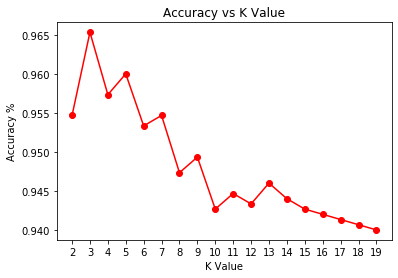

In [85]:
##Visualization of the k value and accuracy changes

plt.plot(accuracy_df["KValue"],accuracy_df["Accuracy"],color="red",marker="o")
plt.xticks(accuracy_df["KValue"])
plt.title('Accuracy vs K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy %') 

In [86]:
##Use the k value from the iteration in the final knn model
knn_model = KNeighborsClassifier(n_neighbors=k_opt)

In [87]:
##First Iteration - Third Model - KNN classifier
#Test Split at 30%
#seed used for initializing random state for repeatability
#Perform cross validation also to check the model flexibility
#k value from above exercise as 3

knn_metrics = build_model("KNN - Iteration 1", knn_model, X, y, test_split=0.30, seed=3,\
                          cross_val=True,comments="KNN with all except Exp and Zip")

In [88]:
#Use the helper function to print the metrics including confusion matrix and classification reports
print_model_metrics(knn_metrics)

Model Name: KNN - Iteration 1 

Training Performance Data

Training accuracy : 0.9808571428571429
Confusion Matrix 
 [[3166    5]
 [  62  267]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3171
           1       0.98      0.81      0.89       329

    accuracy                           0.98      3500
   macro avg       0.98      0.90      0.94      3500
weighted avg       0.98      0.98      0.98      3500


Test Performance Data

Test accuracy : 0.9653333333333334
Confusion Matrix 
 [[1343    6]
 [  46  105]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1349
           1       0.95      0.70      0.80       151

    accuracy                           0.97      1500
   macro avg       0.96      0.85      0.89      1500
weighted avg       0.96      0.97      0.96      1500

Cross Validation Results: {'accuracy_mean

In [89]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(knn_metrics["summary"],\
                                                     name=knn_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.9500,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.8830,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip
KNN - Iteration 1,0.980857,0.965333,0.9672,0.945946,0.695364,0.801527,0.694430,0.933099,KNN with all except Exp and Zip


In [90]:
##Check how a decision tree model will perform on the same problem
##Same parameters as the other models

tree_model = DecisionTreeClassifier(criterion="entropy", max_depth=10)

In [91]:
##Using the helper function to get the model built

tree_metrics = build_model("Decision Tree - Iteration 1", tree_model, X, y, test_split=0.3, seed=3, \
                           cross_val=True,comments="Decistion Tree with all except Exp and Zip")

In [92]:
#Use the helper function to print the metrics
print_model_metrics(tree_metrics)

Model Name: Decision Tree - Iteration 1 

Training Performance Data

Training accuracy : 0.9994285714285714
Confusion Matrix 
 [[3171    0]
 [   2  327]]
Overall summary and scores
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3171
           1       1.00      0.99      1.00       329

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500


Test Performance Data

Test accuracy : 0.9753333333333334
Confusion Matrix 
 [[1332   17]
 [  20  131]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1349
           1       0.89      0.87      0.88       151

    accuracy                           0.98      1500
   macro avg       0.94      0.93      0.93      1500
weighted avg       0.98      0.98      0.98      1500

Cross Validation Results: {'acc

In [93]:
##Top features used by decision tree

pd.DataFrame(tree_model.feature_importances_,columns=["Feat Imp"], \
             index=X.columns).sort_values(by="Feat Imp",ascending=False)

##Income is as expected from the correlations the top category used

,Feat Imp
Income,0.551644
Education,0.179268
Family,0.130298
CCAvg,0.083462
CD Account,0.024935
Age,0.018354
Online,0.008114
CreditCard,0.003926
Mortgage,0.000000
Securities Account,0.000000


In [94]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(tree_metrics["summary"],\
                                                     name=tree_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.9500,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.8830,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip
KNN - Iteration 1,0.980857,0.965333,0.9672,0.945946,0.695364,0.801527,0.694430,0.933099,KNN with all except Exp and Zip
Decision Tree - Iteration 1,0.999429,0.975333,0.9838,0.885135,0.867550,0.876254,0.907012,0.954720,Decistion Tree with all except Exp and Zip


In [ ]:
#KNN and Decision Tree exhibit some amount of overfitting - train accuracy is more than the test accuracy
#Logistic Regression and Naive Bayes seem to exhibit no overfitting
#Recall Value of Class 1 (acceptance of personal loan) is more important measure in our case
#We can tolerate less precision as it only means additional people may get offered loan and they may not accept
#High recall will help us get to all the possible people who may actually accept the loan offer

#NB has an overall accuracy of about 88% which is as good as the null accuracy we had calculated earlier
#but the recall value is around 57%
#Logistic Reg had much better overall accuracy at about 95% with an recall of about 57%

#KNN and Decision Tree had better overall accuracy and recall scores. Decision Tree was the best with about 90% recall
#There is however an sign of overfitting seen based on the training and test accuracy metrics

#We should explore dropping additional features to see if overfitting tendencies can be controlled and also
#see if we can improve uppon the recall value for class 1 (loan acceptance cases)

##At this time among Logisitic Regression, Naive Bayes and KNN we probably will go with Logistic Regression
#The overall accuracy and precision is better and recall value is almost same. 
#KNN will be computationaly very expensive as the customer data points increase in actual use.

#Decision Tree outclasses all the above and if we can control the slight overfitting tendency may be the best model

In [95]:
##Lets try out some automatic feature selection routines for each of these models
#importing sfs

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

In [96]:
#Helper function to use for feature selection
#Use kfold as cross validator
#We will try to narrow down to 5 features by default
#Using only forward selection at this time with floating true

def top_feat_sel(model_name, model, X, y, test_split=0.30,n_feat=5,fwd=True,floating=False):
    '''Helper function to execute steps of feature selection and return top features '''
    
    
    #Split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=5)
    
    ##Preprocessing/Scaling appropriately
    
    ##Scaling using MinMax
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    #Define K fold as cv function
    kfld = KFold(n_splits=10,random_state=5)
    
    #We will use recall as the scoring method
    feature_selector = sfs(model,k_features=n_feat,forward=fwd,floating=floating,cv=kfld,scoring="recall")
    
    feature_selector.fit(X_train,y_train)
    
    all_features = X.columns

    selected_features = [all_features[i] for i in feature_selector.k_feature_idx_]
    print("Model Name :",model_name)
    print("Top Score (Recall): ",feature_selector.k_score_)
    print("\nTop features : ",selected_features)

In [97]:
#Get the top 8 features for a logistic regression model

top_feat_sel("Logistic Regression - Iteration 1",log_model,X,y,fwd=True,floating=True,n_feat=8)

Model Name : Logistic Regression - Iteration 1
Top Score (Recall):  0.5471496553653165

Top features :  ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'CreditCard']


In [98]:
#Get the top 8 features for a Naive Bayes model

top_feat_sel("Naive Bayes - Iteration 1",nb_model,X,y,fwd=True,floating=True,n_feat=8)

Model Name : Naive Bayes - Iteration 1
Top Score (Recall):  0.6054564456843019

Top features :  ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Online', 'CreditCard']


In [99]:
#Lets try to get the top 8 features used for a KNN model

top_feat_sel("KNN - Iteration 1",knn_model,X,y,fwd=True,floating=True,n_feat=8)

Model Name : KNN - Iteration 1
Top Score (Recall):  0.7633881235485858

Top features :  ['Income', 'Family', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [100]:
#Get the top 8 features for a decision tree model

top_feat_sel("Decision Tree - Iteration 1",tree_model,X,y,fwd=True,floating=True,n_feat=8)

Model Name : Decision Tree - Iteration 1
Top Score (Recall):  0.9027321464075317

Top features :  ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online']


In [101]:
##Income, Education, Family seems to be used by all the models
#No other obvious features to drop unanimously
##Lets drop Age and Mortgage since statsmodel logit model indicated no influence and see what happens

In [102]:
##Lets add another helper function to build all these models in one go to help with comparison.
##Model will return the relevant summary metrics for help in comparing and analysing performance
#

def generate_all_models(model_name,comments,X,y,print_details=False):
    
    #Initialize the models
    lr = LogisticRegression()
    knn = KNeighborsClassifier(n_neighbors=3)  #we will go with 3 as the optimum
    nb = GaussianNB()
    tr = DecisionTreeClassifier(criterion="entropy",max_depth=10)
    
    #Use helper methods to build all the four models
    lr_met = build_model(f'Logistic Regression : {model_name}',lr,X,y,test_split=0.3,seed=3,\
                         cross_val=True, comments=comments)
    
    knn_met = build_model(f'KNN : {model_name}',knn,X,y,test_split=0.3,seed=3,\
                         cross_val=True, comments=comments)
    
    nb_met = build_model(f'Naive Bayes : {model_name}',nb,X,y,test_split=0.3,seed=3,\
                         cross_val=True, comments=comments)
    
    tr_met = build_model(f'Decision Tree : {model_name}',tr,X,y,test_split=0.3,seed=3,\
                         cross_val=True, comments=comments)
    
    #Make it false to only get the summary data frame.
    if print_details == True:
        print_model_metrics(lr_met)
        print_model_metrics(knn_met)
        print_model_metrics(nb_met)
        print_model_metrics(tr_met)
    
    #Add the train, test and CV accuracy. Also add the class 1 specific precision and recall values
    summary_df = pd.DataFrame(columns=["Train Accuracy","Test Accuracy","CV Accuracy","Precision (Class 1)",\
                                       "Recall (Class 1)", "F1 Score (Class 1)", "CV Recall","CV ROC_AUC","Comments"])
    
    
    ###Add the model metrics to summary table
    summary_df = summary_df.append(pd.Series(lr_met["summary"],name=lr_met["Model Name"]))
    summary_df = summary_df.append(pd.Series(nb_met["summary"],name=nb_met["Model Name"]))
    summary_df = summary_df.append(pd.Series(knn_met["summary"],name=knn_met["Model Name"]))
    summary_df = summary_df.append(pd.Series(tr_met["summary"],name=tr_met["Model Name"]))
    
    return summary_df



In [103]:
###SECOND ITERATION - Drop Age and Mortgage as well#####

In [104]:
##Get a copy for use
m_df = bank_cust_df.copy()

#Sanity check
m_df.head(2)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,
1,25,49,4,1.6,1,0,0,1,0,0,0
2,45,34,3,1.5,1,0,0,1,0,0,0


In [105]:
##We will not drop the features directly but pick what is needed from the base dataframe and use

#Dropping Online and Mortgage only

include_features = ["Income","Family","CCAvg","Education","Securities Account","CD Account",\
                    "Online","CreditCard"]

#Always pick this as the target 
y = m_df["Personal Loan"]

#pick the relevant features
X = m_df[include_features]

#Sanity
#check for sanity
print("X dataframe \n",X.head(2).T)
print("\ny data frame \n",y.head(2))

X dataframe 
 ID                     1     2
Income              49.0  34.0
Family               4.0   3.0
CCAvg                1.6   1.5
Education            1.0   1.0
Securities Account   1.0   1.0
CD Account           0.0   0.0
Online               0.0   0.0
CreditCard           0.0   0.0

y data frame 
 ID
1    0
2    0
Name: Personal Loan, dtype: int64


In [106]:
##Set the comments to included features and then use the helper function to generate all the new models

#Also prints the accuracy, confusion matrix and classification reports

comments = f'{include_features}'

second_iteration = generate_all_models("Iteration 2",comments,X,y,print_details=True)

Model Name: Logistic Regression : Iteration 2 

Training Performance Data

Training accuracy : 0.9525714285714286
Confusion Matrix 
 [[3145   26]
 [ 140  189]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3171
           1       0.88      0.57      0.69       329

    accuracy                           0.95      3500
   macro avg       0.92      0.78      0.83      3500
weighted avg       0.95      0.95      0.95      3500


Test Performance Data

Test accuracy : 0.9473333333333334
Confusion Matrix 
 [[1331   18]
 [  61   90]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1349
           1       0.83      0.60      0.69       151

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Cross Validation Results:

In [107]:
##Get the summary of second iteration
second_iteration

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression : Iteration 2,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Naive Bayes : Iteration 2,0.891143,0.894000,0.8906,0.479381,0.615894,0.539130,0.566028,0.929625,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
KNN : Iteration 2,0.988571,0.971333,0.9778,0.935484,0.768212,0.843636,0.810875,0.950697,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Decision Tree : Iteration 2,0.999714,0.975333,0.9816,0.875000,0.880795,0.877888,0.900514,0.955347,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."


In [108]:
#Merge the second iteration summary to the earlier model summary to get the full consolidated picture
model_summary_df = model_summary_df.append(second_iteration)

#Check the results
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.9500,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.8830,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip
KNN - Iteration 1,0.980857,0.965333,0.9672,0.945946,0.695364,0.801527,0.694430,0.933099,KNN with all except Exp and Zip
Decision Tree - Iteration 1,0.999429,0.975333,0.9838,0.885135,0.867550,0.876254,0.907012,0.954720,Decistion Tree with all except Exp and Zip
Logistic Regression : Iteration 2,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Naive Bayes : Iteration 2,0.891143,0.894000,0.8906,0.479381,0.615894,0.539130,0.566028,0.929625,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
KNN : Iteration 2,0.988571,0.971333,0.9778,0.935484,0.768212,0.843636,0.810875,0.950697,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Decision Tree : Iteration 2,0.999714,0.975333,0.9816,0.875000,0.880795,0.877888,0.900514,0.955347,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."


In [ ]:
##Accuracy Recall value for both LR and NBB were around the same levels..slight increase in accuracy of NB
##KNN recall value went up and accuracy also went up little bit
##Decision Tree continues to be the top model in terms of accuracy and recall value with not much change in metrics
##The overfitting tendencies continue to be there for KNN and Decision Tree
#We can probably ignore Age and Mortgage from our feature list with not much change in output

In [131]:
#Remaining questions around model buidling, train-test split

In [ ]:
###Lets now try to find the best set of features based on the recall scores for our four models and use that
#to build a final set of models

In [109]:
###Checking automatic features across the board

##include all the features - Exp, ZIP code were not considered. Also not considering Age and Mortgage

include_features = ["Income","Family","CCAvg","Education","Securities Account","CD Account","Online","CreditCard"]

#Always pick this as the target 
y = m_df["Personal Loan"]

#pick the relevant features
X = m_df[include_features]

#Sanity
#check for sanity
print("X dataframe \n",X.head(2).T)
print("\ny data frame \n",y.head(2))

X dataframe 
 ID                     1     2
Income              49.0  34.0
Family               4.0   3.0
CCAvg                1.6   1.5
Education            1.0   1.0
Securities Account   1.0   1.0
CD Account           0.0   0.0
Online               0.0   0.0
CreditCard           0.0   0.0

y data frame 
 ID
1    0
2    0
Name: Personal Loan, dtype: int64


In [110]:
#Lets find out the top features and number of features giving high recall value

#Initialize models
lr_md = LogisticRegression()
nb_md = GaussianNB()
knn_md = KNeighborsClassifier(n_neighbors=3)  ##All our previous optimum k values were 3..we will go with this
tree_md = DecisionTreeClassifier(criterion="entropy",max_depth=10)


In [111]:
##Logistic Regression

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
  
##Preprocessing/Scaling appropriately
  
##Scaling using MinMax
   
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
#Define K fold as cv function
kfld = KFold(n_splits=10,random_state=3)

#Find the top features between 3 and 8 giving maximum recall values. Recall values are cross validated
feature_selector = sfs(lr_md,k_features=(3,8),forward=True,floating=True,cv=kfld,scoring='recall')
  
feature_selector.fit(X_train,y_train)
   
all_features = X.columns
selected_features = [all_features[i] for i in feature_selector.k_feature_idx_]
print("\nTop features : ",selected_features)
print("\n Score",feature_selector.k_score_)
print("\n Selected Subsets\n",feature_selector.subsets_)


Top features :  ['Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

 Score 0.5566490920842979

 Selected Subsets
 {1: {'feature_idx': (0,), 'cv_scores': array([0.2972973 , 0.28125   , 0.3030303 , 0.27777778, 0.20689655,
       0.1875    , 0.3030303 , 0.3030303 , 0.32258065, 0.18181818]), 'avg_score': 0.2664211362869594, 'feature_names': ('0',)}, 2: {'feature_idx': (0, 3), 'cv_scores': array([0.59459459, 0.375     , 0.51515152, 0.41666667, 0.48275862,
       0.375     , 0.51515152, 0.54545455, 0.51612903, 0.3030303 ]), 'avg_score': 0.46389367929968595, 'feature_names': ('0', '3')}, 3: {'feature_idx': (0, 3, 5), 'cv_scores': array([0.51351351, 0.46875   , 0.63636364, 0.44444444, 0.51724138,
       0.4375    , 0.57575758, 0.60606061, 0.64516129, 0.39393939]), 'avg_score': 0.5238731839712096, 'feature_names': ('0', '3', '5')}, 4: {'feature_idx': (0, 3, 5, 7), 'cv_scores': array([0.59459459, 0.46875   , 0.66666667, 0.44444444, 0.55172414,

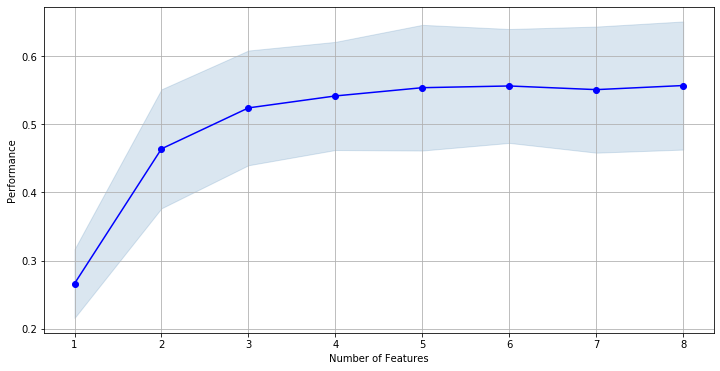

In [112]:
##Plot the results

plt_sfs(feature_selector.get_metric_dict(),kind="std_dev",figsize=(12,6))
plt.grid()

In [113]:
##8 features seem to be the highest recall value. We could probably go with just 6 as well as the difference 
#is very less..buts lets go with all the 8 for now
##Get the features needed for Logistic Regression and keep it for later use
all_features = X.columns
selected_features = feature_selector.subsets_[8]["feature_idx"]
logReg_features = [all_features[i] for i in selected_features]
print(f'Top Features which will be used for Logistic Regression is {len(logReg_features)} features : \n{logReg_features}') 

Top Features which will be used for Logistic Regression is 8 features : 
['Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [114]:
##Lets check for Naive Bayes now
#Find the top features between 3 and 8 giving maximum recall values. Recall values are cross validated
feature_selector = sfs(nb_md,k_features=(3,8),forward=True,floating=True,cv=kfld,scoring='recall')
  
feature_selector.fit(X_train,y_train)
   
all_features = X.columns
selected_features = [all_features[i] for i in feature_selector.k_feature_idx_]
print("\nTop features : ",selected_features)
print("\n Score",feature_selector.k_score_)
print("\n Selected Subsets\n",feature_selector.subsets_)


Top features :  ['Income', 'CCAvg', 'Education', 'CreditCard']

 Score 0.5979257824919673

 Selected Subsets
 {1: {'feature_idx': (0,), 'cv_scores': array([0.54054054, 0.4375    , 0.45454545, 0.44444444, 0.44827586,
       0.375     , 0.48484848, 0.60606061, 0.5483871 , 0.39393939]), 'avg_score': 0.4733541883222084, 'feature_names': ('0',)}, 2: {'feature_idx': (0, 2), 'cv_scores': array([0.72972973, 0.5625    , 0.51515152, 0.55555556, 0.68965517,
       0.46875   , 0.48484848, 0.63636364, 0.61290323, 0.51515152]), 'avg_score': 0.5770608835020683, 'feature_names': ('0', '2')}, 3: {'feature_idx': (0, 2, 3), 'cv_scores': array([0.72972973, 0.46875   , 0.57575758, 0.58333333, 0.68965517,
       0.5       , 0.57575758, 0.72727273, 0.61290323, 0.48484848]), 'avg_score': 0.5948007824919672, 'feature_names': ('0', '2', '3')}, 4: {'feature_idx': (0, 2, 3, 7), 'cv_scores': array([0.72972973, 0.5       , 0.57575758, 0.58333333, 0.68965517,
       0.5       , 0.57575758, 0.72727273, 0.61290323, 0

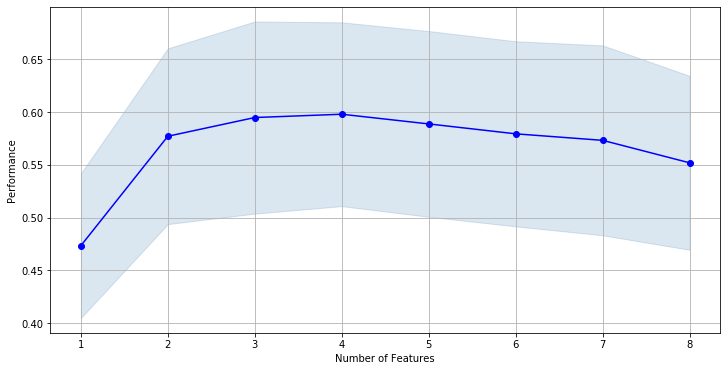

In [115]:
#Plot the results

plt_sfs(feature_selector.get_metric_dict(),kind="std_dev",figsize=(12,6))
plt.grid()

In [116]:
##Top 4 features seem to have the best score
##Get the features needed for Naive Bayes and keep it for later use
all_features = X.columns
selected_features = feature_selector.subsets_[4]["feature_idx"]
nb_features = [all_features[i] for i in selected_features]
print(f'Top Features which will be used for Naive Bayes is {len(nb_features)} features : \n{nb_features}') 

Top Features which will be used for Naive Bayes is 4 features : 
['Income', 'CCAvg', 'Education', 'CreditCard']


In [117]:
##Lets check for KNN now
#Find the top features between 3 and 8 giving maximum recall values. Recall values are cross validated
feature_selector = sfs(knn_md,k_features=(3,8),forward=True,floating=True,cv=kfld,scoring='recall')
  
feature_selector.fit(X_train,y_train)
   
all_features = X.columns
selected_features = [all_features[i] for i in feature_selector.k_feature_idx_]
print("\nTop features : ",selected_features)
print("\n Score",feature_selector.k_score_)
print("\n Selected Subsets\n",feature_selector.subsets_)


Top features :  ['Income', 'Family', 'Education', 'CD Account', 'Online']

 Score 0.8608440428622576

 Selected Subsets
 {1: {'feature_idx': (5,), 'cv_scores': array([0.21621622, 1.        , 0.60606061, 0.72222222, 0.75862069,
       0.65625   , 1.        , 1.        , 1.        , 1.        ]), 'avg_score': 0.7959369734154217, 'feature_names': ('5',)}, 2: {'feature_idx': (0, 5), 'cv_scores': array([0.45945946, 0.46875   , 0.57575758, 0.55555556, 0.44827586,
       0.46875   , 0.48484848, 0.60606061, 0.41935484, 0.48484848]), 'avg_score': 0.497166086730881, 'feature_names': ('0', '5')}, 3: {'feature_idx': (0, 3, 5), 'cv_scores': array([0.78378378, 0.625     , 0.81818182, 0.58333333, 0.72413793,
       0.75      , 0.72727273, 0.78787879, 0.77419355, 0.60606061]), 'avg_score': 0.7179842535932637, 'feature_names': ('0', '3', '5')}, 4: {'feature_idx': (0, 1, 3, 5), 'cv_scores': array([0.86486486, 0.84375   , 0.81818182, 0.80555556, 0.89655172,
       0.875     , 0.78787879, 0.90909091, 0.9

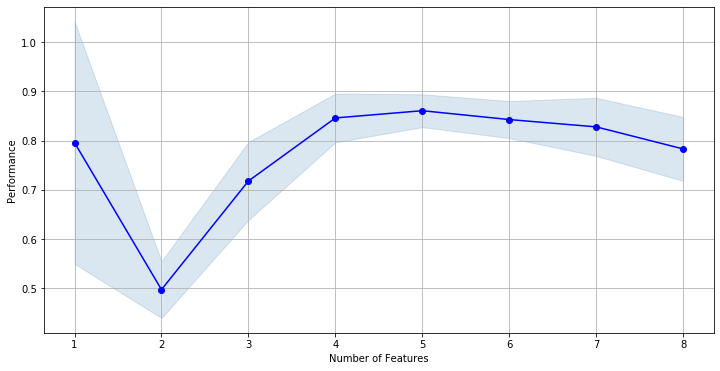

In [118]:
#Plot the results

plt_sfs(feature_selector.get_metric_dict(),kind="std_dev",figsize=(12,6))
plt.grid()

In [119]:
##Top 5 features seem to have the best score
##Get the features needed for KNN and keep it for later use
all_features = X.columns
selected_features = feature_selector.subsets_[5]["feature_idx"]
knn_features = [all_features[i] for i in selected_features]
print(f'Top Features which will be used for Naive Bayes is {len(knn_features)} features : \n{knn_features}') 

Top Features which will be used for Naive Bayes is 5 features : 
['Income', 'Family', 'Education', 'CD Account', 'Online']


In [120]:
##Lets check for Decision Tree now
#Find the top features between 3 and 8 giving maximum recall values. Recall values are cross validated
feature_selector = sfs(tree_md,k_features=(3,8),forward=True,floating=True,cv=kfld,scoring='recall')
  
feature_selector.fit(X_train,y_train)
   
all_features = X.columns
selected_features = [all_features[i] for i in feature_selector.k_feature_idx_]
print("\nTop features : ",selected_features)
print("\n Score",feature_selector.k_score_)
print("\n Selected Subsets\n",feature_selector.subsets_)


Top features :  ['Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'CreditCard']

 Score 0.9265309281751162

 Selected Subsets
 {1: {'feature_idx': (0,), 'cv_scores': array([0.18918919, 0.28125   , 0.39393939, 0.22222222, 0.24137931,
       0.125     , 0.3030303 , 0.42424242, 0.25806452, 0.24242424]), 'avg_score': 0.26807416015216345, 'feature_names': ('0',)}, 2: {'feature_idx': (0, 3), 'cv_scores': array([0.72972973, 0.625     , 0.75757576, 0.58333333, 0.65517241,
       0.65625   , 0.75757576, 0.75757576, 0.74193548, 0.54545455]), 'avg_score': 0.6809602778908953, 'feature_names': ('0', '3')}, 3: {'feature_idx': (0, 1, 3), 'cv_scores': array([0.83783784, 0.84375   , 0.87878788, 0.77777778, 0.86206897,
       0.84375   , 0.81818182, 0.93939394, 0.83870968, 0.75757576]), 'avg_score': 0.8397833652491606, 'feature_names': ('0', '1', '3')}, 4: {'feature_idx': (0, 1, 2, 3), 'cv_scores': array([0.89189189, 0.90625   , 0.90909091, 0.86111111, 0.89655172,
       0.

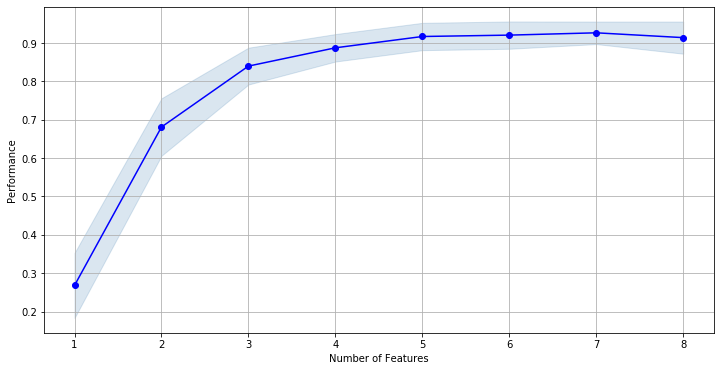

In [121]:
#Plot the results

plt_sfs(feature_selector.get_metric_dict(),kind="std_dev",figsize=(12,6))
plt.grid()

In [122]:
##Top 7 features seem to have the best score
##Get the features needed for Decision Tree and keep it for later use
all_features = X.columns
selected_features = feature_selector.subsets_[7]["feature_idx"]
tree_features = [all_features[i] for i in selected_features]
print(f'Top Features which will be used for Naive Bayes is {len(tree_features)} features : \n{tree_features}') 

Top Features which will be used for Naive Bayes is 7 features : 
['Income', 'Family', 'CCAvg', 'Education', 'Securities Account', 'CD Account', 'CreditCard']


In [ ]:
##Final Iterations of the models using the features identified from above activities

In [123]:
##Logistic Regression

##include features identified from above

include_features = logReg_features

#Always pick this as the target 
y = m_df["Personal Loan"]

#pick the relevant features
X = m_df[include_features]

#Sanity
#check for sanity
print("X dataframe \n",X.head(2).T)
print("\ny data frame \n",y.head(2))

X dataframe 
 ID                     1     2
Income              49.0  34.0
Family               4.0   3.0
CCAvg                1.6   1.5
Education            1.0   1.0
Securities Account   1.0   1.0
CD Account           0.0   0.0
Online               0.0   0.0
CreditCard           0.0   0.0

y data frame 
 ID
1    0
2    0
Name: Personal Loan, dtype: int64


In [124]:
##Use helper function to get the second model

final_log_model_metrics = build_model("Final Logistic Regresion",lr_md,X,y,test_split=0.3,seed=3,\
                                       cross_val=True,comments="Logistic Reg - top selected features")

In [125]:
##Final Logistic regression model metrics
print_model_metrics(final_log_model_metrics)

Model Name: Final Logistic Regresion 

Training Performance Data

Training accuracy : 0.9525714285714286
Confusion Matrix 
 [[3145   26]
 [ 140  189]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3171
           1       0.88      0.57      0.69       329

    accuracy                           0.95      3500
   macro avg       0.92      0.78      0.83      3500
weighted avg       0.95      0.95      0.95      3500


Test Performance Data

Test accuracy : 0.9473333333333334
Confusion Matrix 
 [[1331   18]
 [  61   90]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1349
           1       0.83      0.60      0.69       151

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

Cross Validation Results: {'accura

In [126]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(final_log_model_metrics["summary"],\
                                                     name=final_log_model_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.9500,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.8830,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip
KNN - Iteration 1,0.980857,0.965333,0.9672,0.945946,0.695364,0.801527,0.694430,0.933099,KNN with all except Exp and Zip
Decision Tree - Iteration 1,0.999429,0.975333,0.9838,0.885135,0.867550,0.876254,0.907012,0.954720,Decistion Tree with all except Exp and Zip
Logistic Regression : Iteration 2,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Naive Bayes : Iteration 2,0.891143,0.894000,0.8906,0.479381,0.615894,0.539130,0.566028,0.929625,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
KNN : Iteration 2,0.988571,0.971333,0.9778,0.935484,0.768212,0.843636,0.810875,0.950697,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Decision Tree : Iteration 2,0.999714,0.975333,0.9816,0.875000,0.880795,0.877888,0.900514,0.955347,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Final Logistic Regresion,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,Logistic Reg - top selected features


In [127]:
##Naive Bayes

##include features identified from above

include_features = nb_features

#Always pick this as the target 
y = m_df["Personal Loan"]

#pick the relevant features
X = m_df[include_features]

#Sanity
#check for sanity
print("X dataframe \n",X.head(2).T)
print("\ny data frame \n",y.head(2))

X dataframe 
 ID             1     2
Income      49.0  34.0
CCAvg        1.6   1.5
Education    1.0   1.0
CreditCard   0.0   0.0

y data frame 
 ID
1    0
2    0
Name: Personal Loan, dtype: int64


In [128]:
final_nb_model_metrics = build_model("Final Naive Bayes",nb_md,X,y,test_split=0.30,seed=3,\
                                      cross_val=True,comments="Naive Bayes - top selected features")

In [129]:
print_model_metrics(final_nb_model_metrics)

Model Name: Final Naive Bayes 

Training Performance Data

Training accuracy : 0.9097142857142857
Confusion Matrix 
 [[2988  183]
 [ 133  196]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3171
           1       0.52      0.60      0.55       329

    accuracy                           0.91      3500
   macro avg       0.74      0.77      0.75      3500
weighted avg       0.92      0.91      0.91      3500


Test Performance Data

Test accuracy : 0.9066666666666666
Confusion Matrix 
 [[1268   81]
 [  59   92]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1349
           1       0.53      0.61      0.57       151

    accuracy                           0.91      1500
   macro avg       0.74      0.77      0.76      1500
weighted avg       0.91      0.91      0.91      1500

Cross Validation Results: {'accuracy_mean

In [130]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(final_nb_model_metrics["summary"],\
                                                     name=final_nb_model_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.9500,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.8830,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip
KNN - Iteration 1,0.980857,0.965333,0.9672,0.945946,0.695364,0.801527,0.694430,0.933099,KNN with all except Exp and Zip
Decision Tree - Iteration 1,0.999429,0.975333,0.9838,0.885135,0.867550,0.876254,0.907012,0.954720,Decistion Tree with all except Exp and Zip
Logistic Regression : Iteration 2,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Naive Bayes : Iteration 2,0.891143,0.894000,0.8906,0.479381,0.615894,0.539130,0.566028,0.929625,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
KNN : Iteration 2,0.988571,0.971333,0.9778,0.935484,0.768212,0.843636,0.810875,0.950697,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Decision Tree : Iteration 2,0.999714,0.975333,0.9816,0.875000,0.880795,0.877888,0.900514,0.955347,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Final Logistic Regresion,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,Logistic Reg - top selected features
Final Naive Bayes,0.909714,0.906667,0.9076,0.531792,0.609272,0.567901,0.583906,0.932498,Naive Bayes - top selected features


In [132]:
#KNN Model

##include features identified from above

include_features = knn_features

#Always pick this as the target 
y = m_df["Personal Loan"]

#pick the relevant features
X = m_df[include_features]

#Sanity
#check for sanity
print("X dataframe \n",X.head(2).T)
print("\ny data frame \n",y.head(2))

X dataframe 
 ID           1   2
Income      49  34
Family       4   3
Education    1   1
CD Account   0   0
Online       0   0

y data frame 
 ID
1    0
2    0
Name: Personal Loan, dtype: int64


In [133]:
final_knn_model_metrics = build_model("Final KNN",knn_md,X,y,test_split=0.3,seed=3,\
                                       cross_val=True,comments="KNN - top selected features")

In [134]:
print_model_metrics(final_knn_model_metrics)

Model Name: Final KNN 

Training Performance Data

Training accuracy : 0.9882857142857143
Confusion Matrix 
 [[3163    8]
 [  33  296]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3171
           1       0.97      0.90      0.94       329

    accuracy                           0.99      3500
   macro avg       0.98      0.95      0.96      3500
weighted avg       0.99      0.99      0.99      3500


Test Performance Data

Test accuracy : 0.9686666666666667
Confusion Matrix 
 [[1333   16]
 [  31  120]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1349
           1       0.88      0.79      0.84       151

    accuracy                           0.97      1500
   macro avg       0.93      0.89      0.91      1500
weighted avg       0.97      0.97      0.97      1500

Cross Validation Results: {'accuracy_mean': 0.976

In [135]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(final_knn_model_metrics["summary"],\
                                                     name=final_knn_model_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.9500,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.8830,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip
KNN - Iteration 1,0.980857,0.965333,0.9672,0.945946,0.695364,0.801527,0.694430,0.933099,KNN with all except Exp and Zip
Decision Tree - Iteration 1,0.999429,0.975333,0.9838,0.885135,0.867550,0.876254,0.907012,0.954720,Decistion Tree with all except Exp and Zip
Logistic Regression : Iteration 2,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Naive Bayes : Iteration 2,0.891143,0.894000,0.8906,0.479381,0.615894,0.539130,0.566028,0.929625,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
KNN : Iteration 2,0.988571,0.971333,0.9778,0.935484,0.768212,0.843636,0.810875,0.950697,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Decision Tree : Iteration 2,0.999714,0.975333,0.9816,0.875000,0.880795,0.877888,0.900514,0.955347,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Final Logistic Regresion,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,Logistic Reg - top selected features
Final Naive Bayes,0.909714,0.906667,0.9076,0.531792,0.609272,0.567901,0.583906,0.932498,Naive Bayes - top selected features


In [136]:
#Decision Tree

##include features identified from above

include_features = tree_features

#Always pick this as the target 
y = m_df["Personal Loan"]

#pick the relevant features
X = m_df[include_features]

#Sanity
#check for sanity
print("X dataframe \n",X.head(2).T)
print("\ny data frame \n",y.head(2))

X dataframe 
 ID                     1     2
Income              49.0  34.0
Family               4.0   3.0
CCAvg                1.6   1.5
Education            1.0   1.0
Securities Account   1.0   1.0
CD Account           0.0   0.0
CreditCard           0.0   0.0

y data frame 
 ID
1    0
2    0
Name: Personal Loan, dtype: int64


In [137]:
final_tree_model_metrics = build_model("Final Decision Tree",tree_md,X,y,test_split=0.3,seed=3,
                                        cross_val=True, comments="Decision Tree - top selected features")

In [138]:
print_model_metrics(final_tree_model_metrics)

Model Name: Final Decision Tree 

Training Performance Data

Training accuracy : 0.9994285714285714
Confusion Matrix 
 [[3169    2]
 [   0  329]]
Overall summary and scores
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3171
           1       0.99      1.00      1.00       329

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500


Test Performance Data

Test accuracy : 0.976
Confusion Matrix 
 [[1329   20]
 [  16  135]]
Overall summary and scores
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1349
           1       0.87      0.89      0.88       151

    accuracy                           0.98      1500
   macro avg       0.93      0.94      0.93      1500
weighted avg       0.98      0.98      0.98      1500

Cross Validation Results: {'accuracy_mean': 0.982800

In [139]:
###Add the model metrics to summary table
model_summary_df = model_summary_df.append(pd.Series(final_tree_model_metrics["summary"],\
                                                     name=final_tree_model_metrics["Model Name"]))

#Sanity check
model_summary_df

,Train Accuracy,Test Accuracy,CV Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1),CV Recall,CV ROC_AUC,Comments
Logistic Regression - Iteration 1,0.952000,0.947333,0.9500,0.827273,0.602649,0.697318,0.570073,0.958694,Logistic Reg. with all except Exp. and Zip
Naive Bayes - Iteration 1,0.883429,0.884667,0.8830,0.447619,0.622517,0.520776,0.569434,0.925990,Naive Bayes with all except Exp. and Zip
KNN - Iteration 1,0.980857,0.965333,0.9672,0.945946,0.695364,0.801527,0.694430,0.933099,KNN with all except Exp and Zip
Decision Tree - Iteration 1,0.999429,0.975333,0.9838,0.885135,0.867550,0.876254,0.907012,0.954720,Decistion Tree with all except Exp and Zip
Logistic Regression : Iteration 2,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Naive Bayes : Iteration 2,0.891143,0.894000,0.8906,0.479381,0.615894,0.539130,0.566028,0.929625,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
KNN : Iteration 2,0.988571,0.971333,0.9778,0.935484,0.768212,0.843636,0.810875,0.950697,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Decision Tree : Iteration 2,0.999714,0.975333,0.9816,0.875000,0.880795,0.877888,0.900514,0.955347,"['Income', 'Family', 'CCAvg', 'Education', 'Se..."
Final Logistic Regresion,0.952571,0.947333,0.9504,0.833333,0.596026,0.694981,0.576931,0.959133,Logistic Reg - top selected features
Final Naive Bayes,0.909714,0.906667,0.9076,0.531792,0.609272,0.567901,0.583906,0.932498,Naive Bayes - top selected features


In [ ]:
##Final Model Comments and observations#####

#Logistic Regression Model has an consistent cross validated recall value around 58% 
#with overall accuracy of 95% and F1-score of about 70%

#Naive Bayes Model has improved in the final iteration with an cross validated recall value now at 58%
#with overall accuracy of 90% and F1-score of 57%. The precision is really pulling this model down

#KNN recall value has now jumped to about 87% with accuracy around 98% and F1-score as 90%. 
#Among the three models - LR, NB and KNN - while KNN continues to have higher recall and accuracy values 
#the computational cost is more and therefore we could go with either LR or NB as the final model.
#Among LR and NB considering the precision and recall values and overall accuracy 
#we will select the LR model as the final model for this excercise. 
#There is no overfitting and considering LR is the most flexible among models we will use this.
#We can potentially use some regularization method to further reduce the number of features as well. 
#From an model interpretation or explainability perspective as well LR may be better. 

#The ROC scores are very good for all the models

#Note: Decision Tree has outperfomed these models and could be the choice if available as an option. 
#The overall accuracy and recall values are really high. 
#With some hyperparameter tuning we could potentially reduce the slight overfitting tendency

